# Criação da sessão do PySpark

In [71]:
#iniciar spark
from pyspark import SparkConf
from pyspark.sql import SparkSession

conf = SparkConf()
#conf.set('spark.jars.packages', 'org.apache.hadoop:hadoop-aws:3.2.2')
conf.set('spark.jars.packages', 'org.apache.hadoop:hadoop-aws:3.2.2,com.microsoft.azure:spark-mssql-connector_2.12:1.2.0')
conf.set('spark.hadoop.fs.s3a.aws.credentials.provider', 'com.amazonaws.auth.InstanceProfileCredentialsProvider')

spark = SparkSession.builder.config(conf=conf).getOrCreate()

# Lendo dados CSV tratados vindo de um bucket da S3

In [72]:
BUCKET = 's3a://andre-sprint03-sptech-bucket-tratados/'

# Leitura do dataframe saneamento de água
df_sanitation_water = spark.read.option('delimiter', ',') \
    .option('header', 'true') \
    .csv(BUCKET + 'sanitation_water')

# Leitura do dataframe casos de cholera
df_cholera = spark.read.option('delimiter', ',') \
    .option('header', 'true') \
    .csv(BUCKET + 'cases_of_cholera')

In [73]:
# Verificando os nomes das colunas do dataframe
df_sanitation_water.columns

['Year',
 'Region',
 'Country_code',
 'Country',
 'Population_using_at_least_basic_drinking_water_services_Rural',
 'Population_using_at_least_basic_drinking_water_services_Total',
 'Population_using_at_least_basic_drinking_water_services_Urban',
 'Population_using_safely_managed_drinking_water_services_Rural',
 'Population_using_safely_managed_drinking_water_services_Total',
 'Population_using_safely_managed_drinking_water_services_Urban',
 'Population_using_at_least_basic_sanitation_services_Total',
 'Population_using_at_least_basic_sanitation_services_Urban',
 'Population_using_safely_managed_sanitation_services_Rural',
 'Population_using_safely_managed_sanitation_services_Total',
 'Population_using_safely_managed_sanitation_services_Urban',
 'Population_with_basic_handwashing_facilities_at_home_Rural',
 'Population_with_basic_handwashing_facilities_at_home_Total',
 'Population_with_basic_handwashing_facilities_at_home_Urban',
 'Population_practising_open_defecation_Rural',
 'Popula

In [74]:
# Verificando os nomes das colunas do dataframe
df_cholera.columns

['COUNTRY',
 'YEAR',
 'CASES_CHOLERA',
 'DEATHS_CHOLERA',
 'FATALITY_RATE',
 'REGION']

# Preparação dos dados

In [75]:
# Dataframe antes de trabalhar os datatypes
df_cholera.printSchema()

root
 |-- COUNTRY: string (nullable = true)
 |-- YEAR: string (nullable = true)
 |-- CASES_CHOLERA: string (nullable = true)
 |-- DEATHS_CHOLERA: string (nullable = true)
 |-- FATALITY_RATE: string (nullable = true)
 |-- REGION: string (nullable = true)



In [76]:
# Dataframe antes de trabalhar os datatypes
df_sanitation_water.printSchema()

root
 |-- Year: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Country_code: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Population_using_at_least_basic_drinking_water_services_Rural: string (nullable = true)
 |-- Population_using_at_least_basic_drinking_water_services_Total: string (nullable = true)
 |-- Population_using_at_least_basic_drinking_water_services_Urban: string (nullable = true)
 |-- Population_using_safely_managed_drinking_water_services_Rural: string (nullable = true)
 |-- Population_using_safely_managed_drinking_water_services_Total: string (nullable = true)
 |-- Population_using_safely_managed_drinking_water_services_Urban: string (nullable = true)
 |-- Population_using_at_least_basic_sanitation_services_Total: string (nullable = true)
 |-- Population_using_at_least_basic_sanitation_services_Urban: string (nullable = true)
 |-- Population_using_safely_managed_sanitation_services_Rural: string (nullable = true)
 |-- Populati

In [77]:
from pyspark.sql.types import IntegerType, DecimalType, StringType, DoubleType
from pyspark.sql.functions import col

# Modificando o datatype do Dataframe
df_sanitation_water = df_sanitation_water.select(
    col('Year').cast(IntegerType()),
    col('Region').cast(StringType()),
    col('Country_code').cast(StringType()),
    col('Country').cast(StringType()),
    col('Population_using_at_least_basic_drinking_water_services_Rural').cast(DecimalType(18, 2)),
    col('Population_using_at_least_basic_drinking_water_services_Total').cast(DecimalType(18, 2)),
    col('Population_using_at_least_basic_drinking_water_services_Urban').cast(DecimalType(18, 2)),
    col('Population_using_safely_managed_drinking_water_services_Rural').cast(DecimalType(18, 2)),
    col('Population_using_safely_managed_drinking_water_services_Total').cast(DecimalType(18, 2)),
    col('Population_using_safely_managed_drinking_water_services_Urban').cast(DecimalType(18, 2)),
    col('Population_using_at_least_basic_sanitation_services_Total').cast(DecimalType(18, 2)),
    col('Population_using_at_least_basic_sanitation_services_Urban').cast(DecimalType(18, 2)),
    col('Population_using_safely_managed_sanitation_services_Rural').cast(DecimalType(18, 2)),
    col('Population_using_safely_managed_sanitation_services_Total').cast(DecimalType(18, 2)),
    col('Population_using_safely_managed_sanitation_services_Urban').cast(DecimalType(18, 2)),
    col('Population_with_basic_handwashing_facilities_at_home_Rural').cast(DecimalType(18, 2)),
    col('Population_with_basic_handwashing_facilities_at_home_Total').cast(DecimalType(18, 2)),
    col('Population_with_basic_handwashing_facilities_at_home_Urban').cast(DecimalType(18, 2)),
    col('Population_practising_open_defecation_Rural').cast(DecimalType(18, 2)),
    col('Population_practising_open_defecation_Total').cast(DecimalType(18, 2)),
    col('Population_practising_open_defecation_Urban').cast(DecimalType(18, 2))
)

In [78]:
# Modificando o tipo de dados do Dataframe
df_cholera = df_cholera.select( 
    col('COUNTRY').cast(StringType()),
    col('YEAR').cast(IntegerType()),
    col('CASES_CHOLERA').cast(IntegerType()),
    col('DEATHS_CHOLERA').cast(IntegerType()),
    col('FATALITY_RATE').cast(DecimalType()),
    col('REGION').cast(StringType())
)

In [79]:
# Dataframe após trabalhar os datatypes
df_cholera.printSchema()

root
 |-- COUNTRY: string (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- CASES_CHOLERA: integer (nullable = true)
 |-- DEATHS_CHOLERA: integer (nullable = true)
 |-- FATALITY_RATE: decimal(10,0) (nullable = true)
 |-- REGION: string (nullable = true)



In [80]:
# Dataframe após trabalhar os datatypes
df_sanitation_water.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Region: string (nullable = true)
 |-- Country_code: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Population_using_at_least_basic_drinking_water_services_Rural: decimal(18,2) (nullable = true)
 |-- Population_using_at_least_basic_drinking_water_services_Total: decimal(18,2) (nullable = true)
 |-- Population_using_at_least_basic_drinking_water_services_Urban: decimal(18,2) (nullable = true)
 |-- Population_using_safely_managed_drinking_water_services_Rural: decimal(18,2) (nullable = true)
 |-- Population_using_safely_managed_drinking_water_services_Total: decimal(18,2) (nullable = true)
 |-- Population_using_safely_managed_drinking_water_services_Urban: decimal(18,2) (nullable = true)
 |-- Population_using_at_least_basic_sanitation_services_Total: decimal(18,2) (nullable = true)
 |-- Population_using_at_least_basic_sanitation_services_Urban: decimal(18,2) (nullable = true)
 |-- Population_using_safely_managed_sanitati

In [81]:
df_cholera.show()

+-----------+----+-------------+--------------+-------------+--------------------+
|    COUNTRY|YEAR|CASES_CHOLERA|DEATHS_CHOLERA|FATALITY_RATE|              REGION|
+-----------+----+-------------+--------------+-------------+--------------------+
|Afghanistan|2016|          677|             5|            1|Eastern Mediterra...|
|Afghanistan|2015|        58064|             8|            0|Eastern Mediterra...|
|Afghanistan|2014|        45481|             4|            0|Eastern Mediterra...|
|Afghanistan|2013|         3957|            14|            0|Eastern Mediterra...|
|Afghanistan|2012|           12|             0|            0|Eastern Mediterra...|
|Afghanistan|2011|         3733|            44|            1|Eastern Mediterra...|
|Afghanistan|2010|         2369|            10|            0|Eastern Mediterra...|
|Afghanistan|2009|          662|            11|            2|Eastern Mediterra...|
|Afghanistan|2008|         4384|            22|            1|Eastern Mediterra...|
|Afg

In [82]:
df_cholera.show()

+-----------+----+-------------+--------------+-------------+--------------------+
|    COUNTRY|YEAR|CASES_CHOLERA|DEATHS_CHOLERA|FATALITY_RATE|              REGION|
+-----------+----+-------------+--------------+-------------+--------------------+
|Afghanistan|2016|          677|             5|            1|Eastern Mediterra...|
|Afghanistan|2015|        58064|             8|            0|Eastern Mediterra...|
|Afghanistan|2014|        45481|             4|            0|Eastern Mediterra...|
|Afghanistan|2013|         3957|            14|            0|Eastern Mediterra...|
|Afghanistan|2012|           12|             0|            0|Eastern Mediterra...|
|Afghanistan|2011|         3733|            44|            1|Eastern Mediterra...|
|Afghanistan|2010|         2369|            10|            0|Eastern Mediterra...|
|Afghanistan|2009|          662|            11|            2|Eastern Mediterra...|
|Afghanistan|2008|         4384|            22|            1|Eastern Mediterra...|
|Afg

# Exploração de análises sobre colera

In [83]:
df_cholera.printSchema()

root
 |-- COUNTRY: string (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- CASES_CHOLERA: integer (nullable = true)
 |-- DEATHS_CHOLERA: integer (nullable = true)
 |-- FATALITY_RATE: decimal(10,0) (nullable = true)
 |-- REGION: string (nullable = true)



In [84]:
from pyspark.sql.functions import sum as sparkSum

casos_globais = df_cholera.groupBy(col('YEAR').alias('Anos')).agg(\
    sparkSum("CASES_CHOLERA").alias('Casos de colera'), \
    sparkSum('DEATHS_CHOLERA').alias('Mortes por colera'))

casos_globais.show()

+----+---------------+-----------------+
|Anos|Casos de colera|Mortes por colera|
+----+---------------+-----------------+
|1959|          36138|            19367|
|1990|          74764|             2802|
|1975|          93055|             7079|
|1977|          63276|             2177|
|2003|         111569|             1894|
|2007|         178678|             4033|
|1974|          97635|             7649|
|2015|         172454|             1304|
|1955|          40218|            17476|
|2006|         236773|             6300|
|1978|          77678|             3354|
|1961|          61966|            30528|
|2013|         129067|             2102|
|1952|         123025|            71397|
|1956|          63542|            32523|
|1997|         149416|             6371|
|1988|          53920|             2855|
|1994|         385408|            10750|
|1968|          34164|              830|
|2014|         190549|             2231|
+----+---------------+-----------------+
only showing top

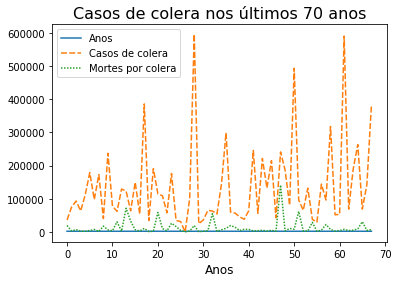

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

df_casos_globais = casos_globais.toPandas()

ax = sns.lineplot(data=df_casos_globais)

plt.xlabel('Anos', fontsize=12)
plt.title('Casos de colera nos últimos 70 anos', fontsize=16)
plt.show()

In [86]:
casos_regiao = df_cholera.groupBy(col('YEAR').alias('Anos'), col('REGION').alias('Regiao')).agg(\
    sparkSum("CASES_CHOLERA").alias('Casos de colera'))

casos_regiao.show()

+----+--------------------+---------------+
|Anos|              Regiao|Casos de colera|
+----+--------------------+---------------+
|1992|Eastern Mediterra...|            198|
|1994|              Africa|         132951|
|2006|     South-East Asia|           1974|
|1979|            Americas|              5|
|1989|              Europe|             11|
|1961|     Western Pacific|           9923|
|1993|     Western Pacific|          24633|
|2000|     South-East Asia|           5076|
|1963|     Western Pacific|           4839|
|1953|     South-East Asia|         240878|
|1983|     South-East Asia|          24946|
|1990|Eastern Mediterra...|           4753|
|2015|            Americas|          36664|
|1987|     South-East Asia|          19469|
|1974|     Western Pacific|           2371|
|1969|Eastern Mediterra...|           1274|
|1999|Eastern Mediterra...|          45750|
|1963|     South-East Asia|          54598|
|1970|              Europe|           1295|
|1998|Eastern Mediterra...|     

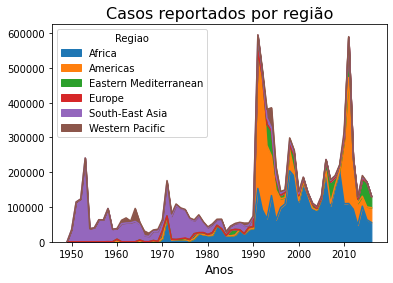

In [87]:
df_casos_regiao = casos_regiao.toPandas()

df_casos_regiao = df_casos_regiao.pivot(index = 'Anos', columns = 'Regiao', values = 'Casos de colera').fillna(0.0)

df_casos_regiao.plot.area()

plt.title('Casos reportados por região', fontsize=16)
plt.xlabel('Anos', fontsize=12)
plt.show()

In [88]:
casos_regiao.show()

+----+--------------------+---------------+
|Anos|              Regiao|Casos de colera|
+----+--------------------+---------------+
|1992|Eastern Mediterra...|            198|
|1994|              Africa|         132951|
|2006|     South-East Asia|           1974|
|1979|            Americas|              5|
|1989|              Europe|             11|
|1961|     Western Pacific|           9923|
|1993|     Western Pacific|          24633|
|2000|     South-East Asia|           5076|
|1963|     Western Pacific|           4839|
|1953|     South-East Asia|         240878|
|1983|     South-East Asia|          24946|
|1990|Eastern Mediterra...|           4753|
|2015|            Americas|          36664|
|1987|     South-East Asia|          19469|
|1974|     Western Pacific|           2371|
|1969|Eastern Mediterra...|           1274|
|1999|Eastern Mediterra...|          45750|
|1963|     South-East Asia|          54598|
|1970|              Europe|           1295|
|1998|Eastern Mediterra...|     

In [89]:
import pandas as pd

codes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv').set_index('COUNTRY')

casos_paises = df_cholera.groupBy(col('YEAR').alias('Year'), col('COUNTRY').alias('Country')).agg(\
    sparkSum("CASES_CHOLERA").alias('Cases')).orderBy('YEAR')

casos_paises = casos_paises.toPandas()

casos_paises = casos_paises.join(codes, how='left', on='Country')

In [90]:
import plotly.express as px

fig = px.choropleth(
    casos_paises, 
    locations = "CODE",
    color = "Cases",
    hover_name = "Country",
    color_continuous_scale = px.colors.sequential.Plasma,
    animation_frame = 'Year',
    animation_group = 'Country',
    range_color = [0, 100000]
)

fig.show()

In [91]:
from pyspark.sql.types import *

df_schema = StructType([StructField("Year", IntegerType(), True)\
                       ,StructField("Country", StringType(), True)\
                       ,StructField("Cases", IntegerType(), True)\
                       ,StructField("GDP (BILLIONS)", DoubleType(), True)\
                       ,StructField("CODE", StringType(), True)])

df_colera_map = spark.createDataFrame(casos_paises, schema=df_schema)

# Exploração de análises sobre saneamento de água

In [92]:
df_sanitation_water.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Region: string (nullable = true)
 |-- Country_code: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Population_using_at_least_basic_drinking_water_services_Rural: decimal(18,2) (nullable = true)
 |-- Population_using_at_least_basic_drinking_water_services_Total: decimal(18,2) (nullable = true)
 |-- Population_using_at_least_basic_drinking_water_services_Urban: decimal(18,2) (nullable = true)
 |-- Population_using_safely_managed_drinking_water_services_Rural: decimal(18,2) (nullable = true)
 |-- Population_using_safely_managed_drinking_water_services_Total: decimal(18,2) (nullable = true)
 |-- Population_using_safely_managed_drinking_water_services_Urban: decimal(18,2) (nullable = true)
 |-- Population_using_at_least_basic_sanitation_services_Total: decimal(18,2) (nullable = true)
 |-- Population_using_at_least_basic_sanitation_services_Urban: decimal(18,2) (nullable = true)
 |-- Population_using_safely_managed_sanitati

In [93]:
# Pessoas usando serviços de água bebível por país e ano
# Country, country_code, Population_using_at_least_basic_drinking_water_services_Total

In [94]:
df_agua_tratada_pais = df_sanitation_water.select(
    col('Year').alias('ANOS'),
    col('Country').alias('PAIS'),
    col('Country_code').alias('CODIGO'),
    col('Population_using_at_least_basic_drinking_water_services_Total').cast(DoubleType()).alias('POPULACAO_USANDO_SERVICOS_BASICOS_AGUA_POTAVEL')
)

df_agua_tratada_pais = df_agua_tratada_pais.groupBy(col('ANOS'), col('PAIS'), col('CODIGO')) \
    .agg(sparkSum(col('POPULACAO_USANDO_SERVICOS_BASICOS_AGUA_POTAVEL')).alias('POPULACAO_USANDO_SERVICOS_BASICOS_AGUA_POTAVEL')).orderBy('ANOS')

df_agua_tratada_pais.filter(df_agua_tratada_pais['PAIS'] == 'Brazil').orderBy('ANOS').show()

df_agua_tratada_pais_pandas = df_agua_tratada_pais.toPandas()

+----+------+------+----------------------------------------------+
|ANOS|  PAIS|CODIGO|POPULACAO_USANDO_SERVICOS_BASICOS_AGUA_POTAVEL|
+----+------+------+----------------------------------------------+
|2000|Brazil|   BRA|                                         93.65|
|2001|Brazil|   BRA|                                         93.96|
|2002|Brazil|   BRA|                                         94.24|
|2003|Brazil|   BRA|                                         94.52|
|2004|Brazil|   BRA|                                          94.8|
|2005|Brazil|   BRA|                                         95.07|
|2006|Brazil|   BRA|                                         95.33|
|2007|Brazil|   BRA|                                         95.59|
|2008|Brazil|   BRA|                                         95.84|
|2009|Brazil|   BRA|                                         96.09|
|2010|Brazil|   BRA|                                         96.33|
|2011|Brazil|   BRA|                            

In [95]:
fig2 = px.choropleth(
    df_agua_tratada_pais_pandas, 
    locations = "CODIGO",
    color = "POPULACAO_USANDO_SERVICOS_BASICOS_AGUA_POTAVEL",
    hover_name = "PAIS",
    color_continuous_scale = px.colors.sequential.Plasma,
    animation_frame = 'ANOS',
    animation_group = 'PAIS',
    range_color = [0, 100]
)

fig2.show()

In [96]:
df_agua_tratada_pais_pandas = spark.createDataFrame(df_agua_tratada_pais_pandas)

df_agua_tratada_pais_pandas.filter(df_agua_tratada_pais_pandas['CODIGO'] == 'USA').orderBy('ANOS').show()

+----+--------------------+------+----------------------------------------------+
|ANOS|                PAIS|CODIGO|POPULACAO_USANDO_SERVICOS_BASICOS_AGUA_POTAVEL|
+----+--------------------+------+----------------------------------------------+
|2000|United States of ...|   USA|                                           0.0|
|2001|United States of ...|   USA|                                           0.0|
|2002|United States of ...|   USA|                                           0.0|
|2003|United States of ...|   USA|                                           0.0|
|2004|United States of ...|   USA|                                           0.0|
|2005|United States of ...|   USA|                                         99.21|
|2006|United States of ...|   USA|                                         99.21|
|2007|United States of ...|   USA|                                         99.22|
|2008|United States of ...|   USA|                                         99.22|
|2009|United Sta

In [97]:
from pyspark.sql.functions import when, lit

df_agua_tratada_pais_pandas = df_agua_tratada_pais_pandas.withColumn('POPULACAO_USANDO_SERVICOS_BASICOS_AGUA_POTAVEL', when(df_agua_tratada_pais_pandas.POPULACAO_USANDO_SERVICOS_BASICOS_AGUA_POTAVEL == 0.0, lit(100.0)).otherwise(df_agua_tratada_pais_pandas.POPULACAO_USANDO_SERVICOS_BASICOS_AGUA_POTAVEL))

df_agua_tratada_pais_pandas.filter(df_agua_tratada_pais_pandas['CODIGO'] == 'USA').orderBy('ANOS').show()

df_agua_tratada_pais_pandas = df_agua_tratada_pais_pandas.toPandas()

+----+--------------------+------+----------------------------------------------+
|ANOS|                PAIS|CODIGO|POPULACAO_USANDO_SERVICOS_BASICOS_AGUA_POTAVEL|
+----+--------------------+------+----------------------------------------------+
|2000|United States of ...|   USA|                                         100.0|
|2001|United States of ...|   USA|                                         100.0|
|2002|United States of ...|   USA|                                         100.0|
|2003|United States of ...|   USA|                                         100.0|
|2004|United States of ...|   USA|                                         100.0|
|2005|United States of ...|   USA|                                         99.21|
|2006|United States of ...|   USA|                                         99.21|
|2007|United States of ...|   USA|                                         99.22|
|2008|United States of ...|   USA|                                         99.22|
|2009|United Sta

In [98]:
fig2 = px.choropleth(
    df_agua_tratada_pais_pandas, 
    locations = "CODIGO",
    color = "POPULACAO_USANDO_SERVICOS_BASICOS_AGUA_POTAVEL",
    hover_name = "PAIS",
    color_continuous_scale = px.colors.sequential.Plasma,
    animation_frame = 'ANOS',
    animation_group = 'PAIS',
    range_color = [0, 100]
)

fig2.show()

In [99]:
df_sanitation_water.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Region: string (nullable = true)
 |-- Country_code: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Population_using_at_least_basic_drinking_water_services_Rural: decimal(18,2) (nullable = true)
 |-- Population_using_at_least_basic_drinking_water_services_Total: decimal(18,2) (nullable = true)
 |-- Population_using_at_least_basic_drinking_water_services_Urban: decimal(18,2) (nullable = true)
 |-- Population_using_safely_managed_drinking_water_services_Rural: decimal(18,2) (nullable = true)
 |-- Population_using_safely_managed_drinking_water_services_Total: decimal(18,2) (nullable = true)
 |-- Population_using_safely_managed_drinking_water_services_Urban: decimal(18,2) (nullable = true)
 |-- Population_using_at_least_basic_sanitation_services_Total: decimal(18,2) (nullable = true)
 |-- Population_using_at_least_basic_sanitation_services_Urban: decimal(18,2) (nullable = true)
 |-- Population_using_safely_managed_sanitati

In [100]:
#df_populacao_br_defecando_aberto = spark.createDataFrame(df_populacao_br_defecando_aberto)

df_populacao_br_defecando_aberto = df_sanitation_water.select(
    col('Year').alias('ANOS'),
    col('Country_code').alias('CODIGO'),
    col('Population_practising_open_defecation_Rural').cast(DoubleType()).alias('POPULACAO_RURAL_DEFECANDO_EM_ABERTO'),
    col('Population_practising_open_defecation_Urban').cast(DoubleType()).alias('POPULACAO_URBANA_DEFECANDO_EM_ABERTO')
)

df_populacao_br_defecando_aberto = df_populacao_br_defecando_aberto.groupBy(col('ANOS'), col('CODIGO')) \
    .agg(sparkSum(col('POPULACAO_URBANA_DEFECANDO_EM_ABERTO')).alias('POPULACAO_URBANA_DEFECANDO_EM_ABERTO'),\
        sparkSum(col('POPULACAO_RURAL_DEFECANDO_EM_ABERTO')).alias('POPULACAO_RURAL_DEFECANDO_EM_ABERTO')).filter(df_populacao_br_defecando_aberto['CODIGO'] == 'BRA').orderBy('ANOS')

df_populacao_br_defecando_aberto.filter(df_populacao_br_defecando_aberto['CODIGO'] == 'BRA').orderBy('ANOS').show()

+----+------+------------------------------------+-----------------------------------+
|ANOS|CODIGO|POPULACAO_URBANA_DEFECANDO_EM_ABERTO|POPULACAO_RURAL_DEFECANDO_EM_ABERTO|
+----+------+------------------------------------+-----------------------------------+
|2000|   BRA|                                3.01|                              34.51|
|2001|   BRA|                                2.84|                              32.91|
|2002|   BRA|                                2.68|                               31.3|
|2003|   BRA|                                2.51|                              29.69|
|2004|   BRA|                                2.34|                              28.08|
|2005|   BRA|                                2.17|                              26.48|
|2006|   BRA|                                2.01|                              24.87|
|2007|   BRA|                                1.84|                              23.26|
|2008|   BRA|                              

In [101]:
df_populacao_br_defecando_aberto = df_populacao_br_defecando_aberto.toPandas()
df_populacao_br_defecando_aberto = df_populacao_br_defecando_aberto.drop('CODIGO', 1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



Text(0, 0.5, 'População')

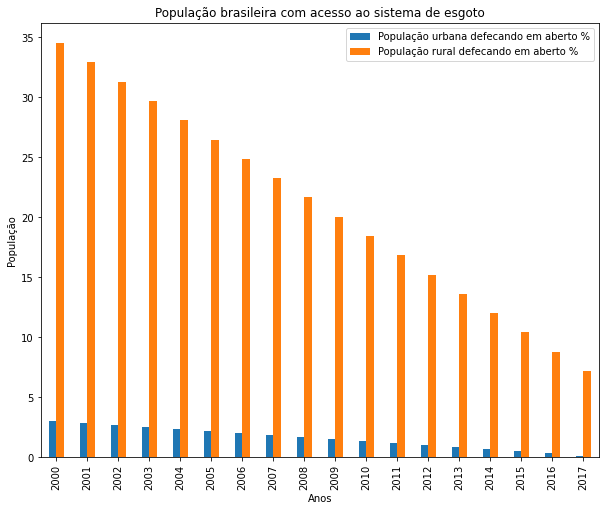

In [102]:
ax = df_populacao_br_defecando_aberto.plot.bar(x='ANOS',figsize=(10,8))
ax.legend(["População urbana defecando em aberto %", "População rural defecando em aberto %"]);

plt.title('População brasileira com acesso ao sistema de esgoto')
plt.xlabel("Anos")
plt.ylabel("População")

In [103]:
#df_populacao_br_defecando_aberto = spark.createDataFrame(df_populacao_br_defecando_aberto)

df_populacao_ago_defecando_aberto = df_sanitation_water.select(
    col('Year').alias('ANOS'),
    col('Country_code').alias('CODIGO'),
    col('Population_practising_open_defecation_Rural').cast(DoubleType()).alias('POPULACAO_RURAL_DEFECANDO_EM_ABERTO'),
    col('Population_practising_open_defecation_Urban').cast(DoubleType()).alias('POPULACAO_URBANA_DEFECANDO_EM_ABERTO')
)

df_populacao_ago_defecando_aberto = df_populacao_ago_defecando_aberto.groupBy(col('ANOS'), col('CODIGO')) \
    .agg(sparkSum(col('POPULACAO_URBANA_DEFECANDO_EM_ABERTO')).alias('POPULACAO_URBANA_DEFECANDO_EM_ABERTO'),\
        sparkSum(col('POPULACAO_RURAL_DEFECANDO_EM_ABERTO')).alias('POPULACAO_RURAL_DEFECANDO_EM_ABERTO')).filter(df_populacao_ago_defecando_aberto['CODIGO'] == 'AGO').orderBy('ANOS')

df_populacao_ago_defecando_aberto.filter(df_populacao_ago_defecando_aberto['CODIGO'] == 'AGO').orderBy('ANOS').show()

+----+------+------------------------------------+-----------------------------------+
|ANOS|CODIGO|POPULACAO_URBANA_DEFECANDO_EM_ABERTO|POPULACAO_RURAL_DEFECANDO_EM_ABERTO|
+----+------+------------------------------------+-----------------------------------+
|2000|   AGO|                                19.1|                              66.71|
|2001|   AGO|                               18.04|                              66.02|
|2002|   AGO|                               16.97|                              65.32|
|2003|   AGO|                                15.9|                              64.62|
|2004|   AGO|                               14.84|                              63.92|
|2005|   AGO|                               13.77|                              63.23|
|2006|   AGO|                                12.7|                              62.53|
|2007|   AGO|                               11.64|                              61.83|
|2008|   AGO|                              

In [104]:
df_populacao_ago_defecando_aberto = df_populacao_ago_defecando_aberto.toPandas()
df_populacao_ago_defecando_aberto = df_populacao_ago_defecando_aberto.drop('CODIGO', 1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



Text(0, 0.5, 'População')

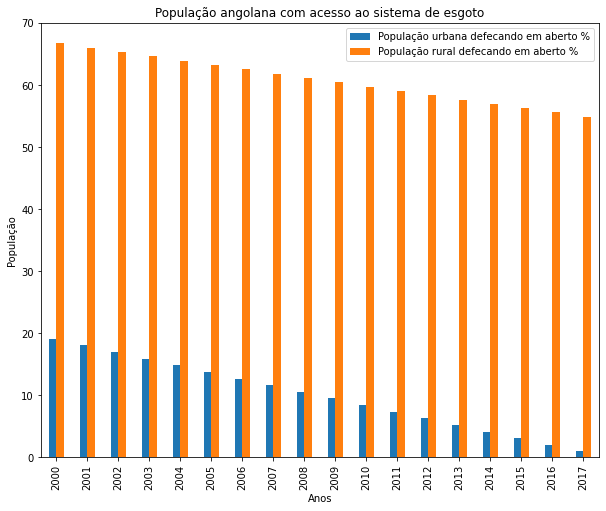

In [105]:
ax = df_populacao_ago_defecando_aberto.plot.bar(x='ANOS',figsize=(10,8))
ax.legend(["População urbana defecando em aberto %", "População rural defecando em aberto %"]);

plt.title('População angolana com acesso ao sistema de esgoto')
plt.xlabel("Anos")
plt.ylabel("População")

# Fazendo upload dos datasets sobre colera no S3

In [106]:
BUCKET = 's3a://andre-sprint03-sptech-bucket-cliente/'

In [107]:
df_colera_map.write \
   .option("header", "true") \
   .mode('overwrite') \
   .csv(BUCKET + 'df_colera_mapa_calor')

22/06/12 19:46:22 WARN AbstractS3ACommitterFactory: Using standard FileOutputCommitter to commit work. This is slow and potentially unsafe.
22/06/12 19:46:22 WARN AbstractS3ACommitterFactory: Using standard FileOutputCommitter to commit work. This is slow and potentially unsafe.
22/06/12 19:46:22 WARN AbstractS3ACommitterFactory: Using standard FileOutputCommitter to commit work. This is slow and potentially unsafe.


In [109]:
casos_regiao.write \
   .option("header", "true") \
   .mode('overwrite') \
   .csv(BUCKET + 'df_colera_regiao')

22/06/12 19:46:34 WARN AbstractS3ACommitterFactory: Using standard FileOutputCommitter to commit work. This is slow and potentially unsafe.
22/06/12 19:46:35 WARN AbstractS3ACommitterFactory: Using standard FileOutputCommitter to commit work. This is slow and potentially unsafe.


In [ ]:
df_casos_colera_globais = spark.createDataFrame(df_casos_globais)

df_casos_colera_globais.write \
   .option("header", "true") \
   .mode('overwrite') \
   .csv(BUCKET + 'df_colera_globais')

# Upload dos datasets sobre saneamento

In [ ]:
df_agua_tratada_pais_pandas = spark.createDataFrame(df_agua_tratada_pais_pandas)

df_agua_tratada_pais_pandas.write \
   .option("header", "true") \
   .mode('overwrite') \
   .csv(BUCKET + 'df_agua_tratada_pais_pandas')

In [ ]:
df_populacao_ago_defecando_aberto = spark.createDataFrame(df_populacao_ago_defecando_aberto)
df_populacao_ago_defecando_aberto.write \
   .option("header", "true") \
   .mode('overwrite') \
   .csv(BUCKET + 'df_populacao_ago_defecando_aberto')

In [ ]:
df_populacao_br_defecando_aberto = spark.createDataFrame(df_populacao_br_defecando_aberto)
df_populacao_br_defecando_aberto.write \
   .option("header", "true") \
   .mode('overwrite') \
   .csv(BUCKET + 'df_populacao_br_defecando_aberto')